In [19]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
from scipy.stats import zscore
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot
from data_preprocessing.preprocessing import movie_paths

In [51]:
# parameters to tweak
monkey_name = "red"
day = "0825"
npx = False
imec_n = 0
resolution_Hz = 100

# paths setting 
data_path = f"{paths['livingstone_lab']}/tiziano/data"
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [52]:
# loading of the data
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [53]:
stimuli_names = list(data.keys())
print(len(stimuli_names), stimuli_names)

19 ['IMG_4664.mp4', 'IMG_4671.mp4', 'IMG_4655.mp4', 'IMG_4662.mp4', 'IMG_4665.mp4', 'IMG_4661.mp4', 'IMG_4670.mp4', 'IMG_4658.mp4', 'IMG_4667.mp4', 'IMG_4659.mp4', 'IMG_4669.mp4', 'IMG_4672.mp4', 'IMG_4668.mp4', 'IMG_4666.mp4', 'IMG_4657.mp4', 'IMG_4663.mp4', 'IMG_4673.mp4', 'IMG_4660.mp4', 'IMG_4656.mp4']


Text(0.5, 0, 'timepoints')

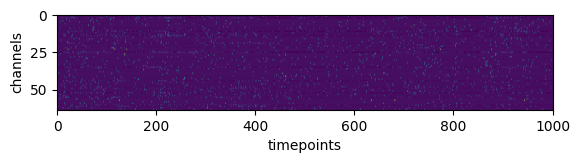

In [54]:
plt.imshow(zscore(data[stimuli_names[0]][:,:,0], axis=1), aspect=3, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

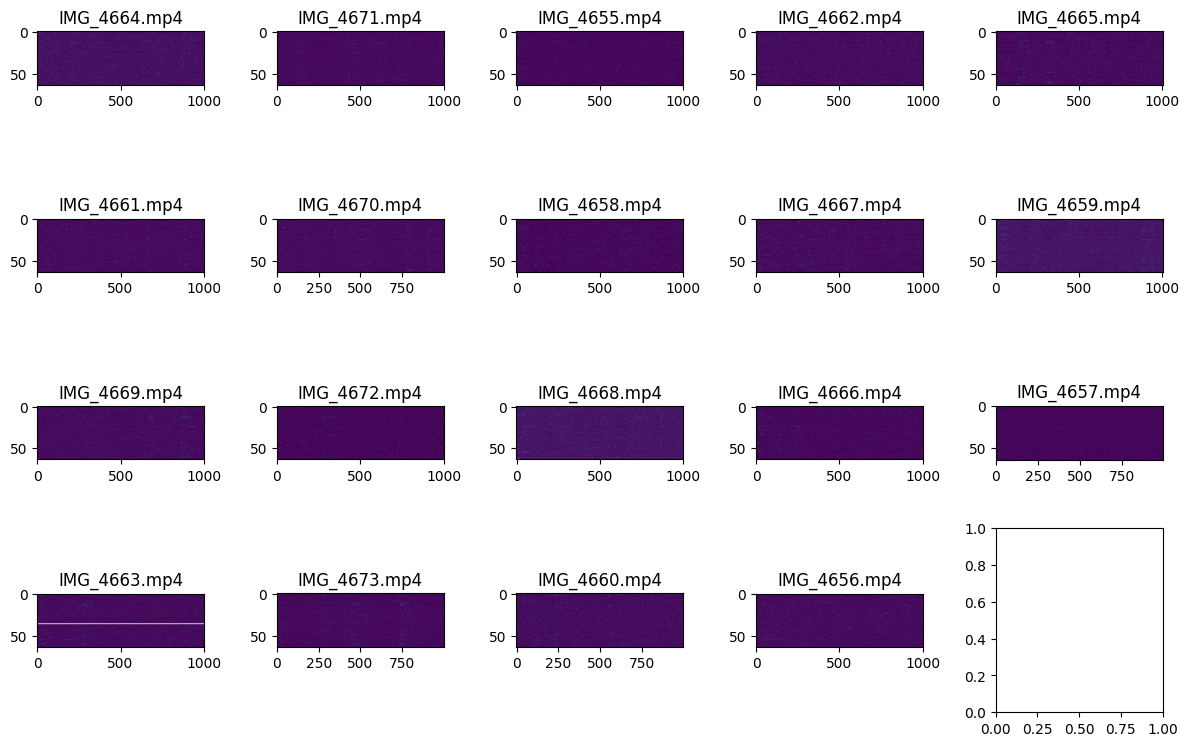

In [55]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    axes_flat[i].imshow(zscore(data[s][:,:,0], axis=1), aspect=5)
    axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

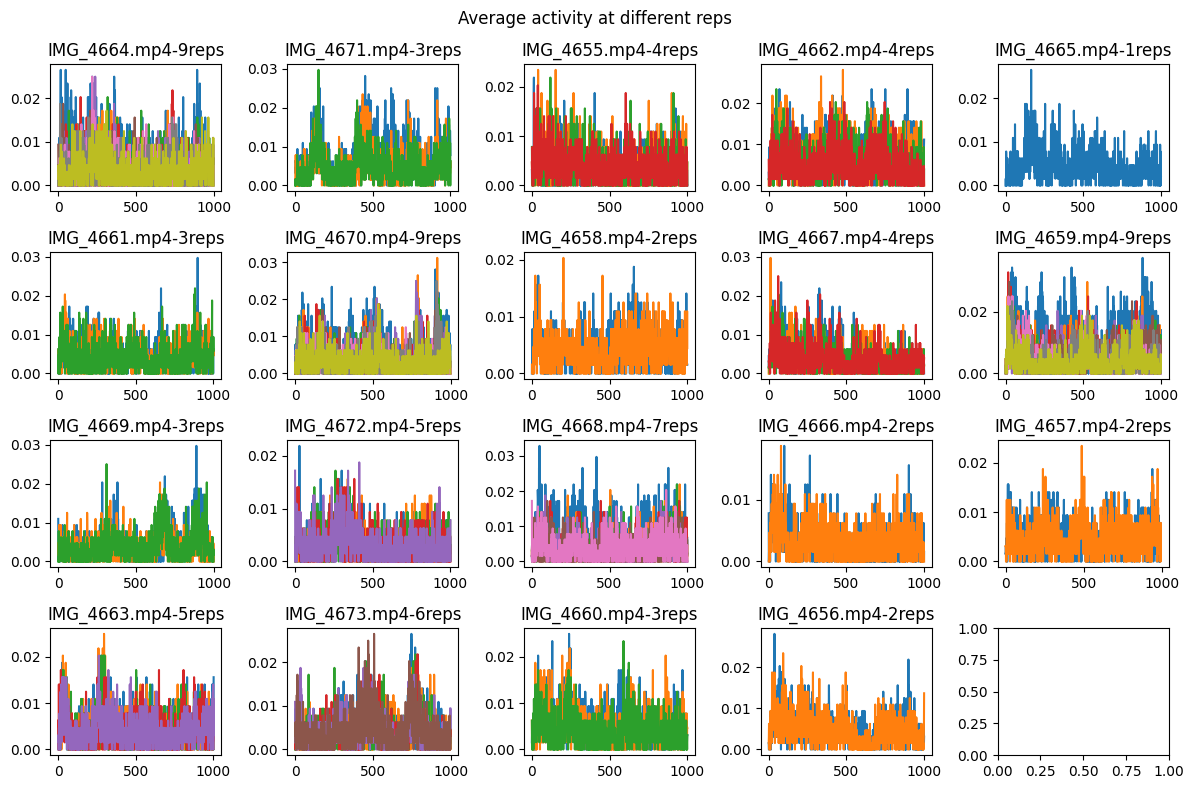

In [56]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    axes_flat[i].plot(avg_units)
    axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


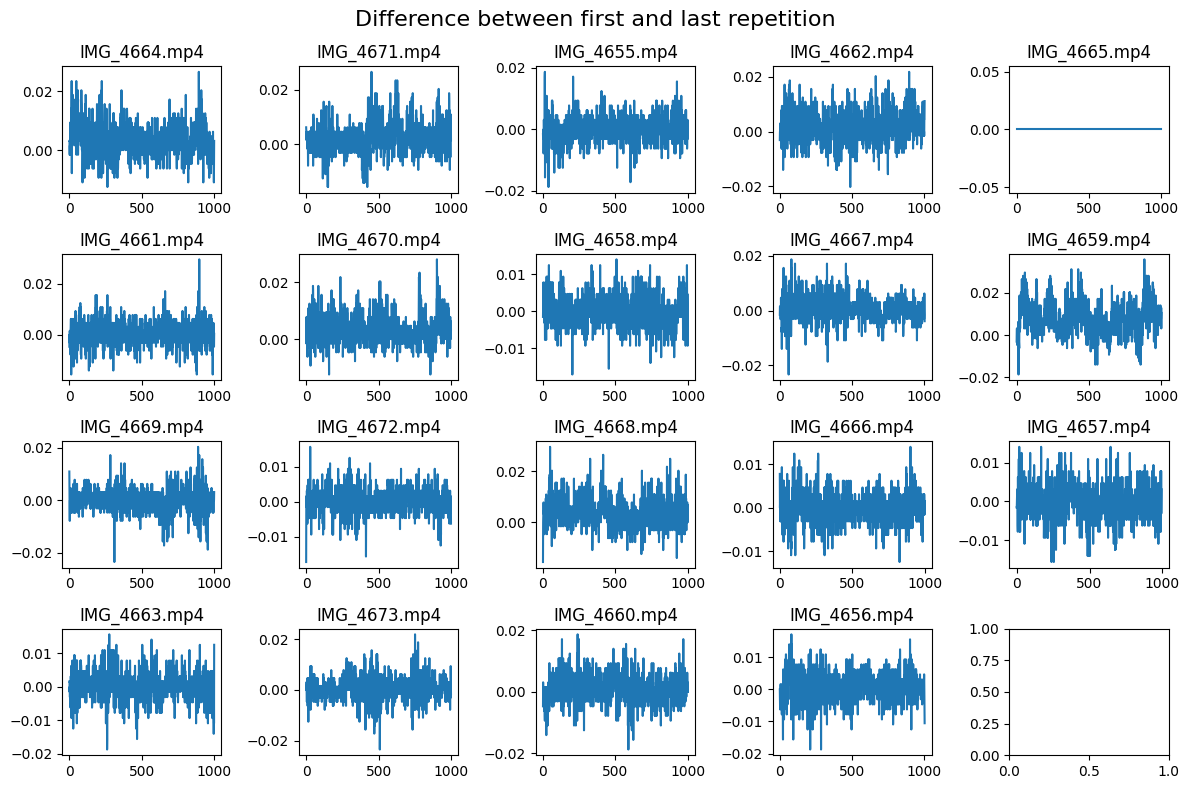

In [57]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    first_vs_last = avg_units[:,0] - avg_units[:,-1]
    axes_flat[i].plot(first_vs_last)
    axes_flat[i].set_title(s)
    counter += 1
fig.suptitle("Difference between first and last repetition", fontsize=16)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [58]:
print("first vs last repetition correlation of the average time series")
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:,0], avg_units[:,-1])
    print(s, np.round(corrfirst_vs_last[0,1], 2), f"with {n_repetitions} reps")

first vs last repetition correlation of the average time series
IMG_4664.mp4 0.01 with 9 reps
IMG_4671.mp4 0.26 with 3 reps
IMG_4655.mp4 0.05 with 4 reps
IMG_4662.mp4 0.03 with 4 reps
IMG_4665.mp4 1.0 with 1 reps
IMG_4661.mp4 0.04 with 3 reps
IMG_4670.mp4 0.12 with 9 reps
IMG_4658.mp4 0.06 with 2 reps
IMG_4667.mp4 0.16 with 4 reps
IMG_4659.mp4 0.04 with 9 reps
IMG_4669.mp4 0.26 with 3 reps
IMG_4672.mp4 0.19 with 5 reps
IMG_4668.mp4 0.07 with 7 reps
IMG_4666.mp4 0.17 with 2 reps
IMG_4657.mp4 0.09 with 2 reps
IMG_4663.mp4 0.18 with 5 reps
IMG_4673.mp4 0.33 with 6 reps
IMG_4660.mp4 0.15 with 3 reps
IMG_4656.mp4 0.24 with 2 reps


In [59]:
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

16:15:42 - There are nans in corr_mat


/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


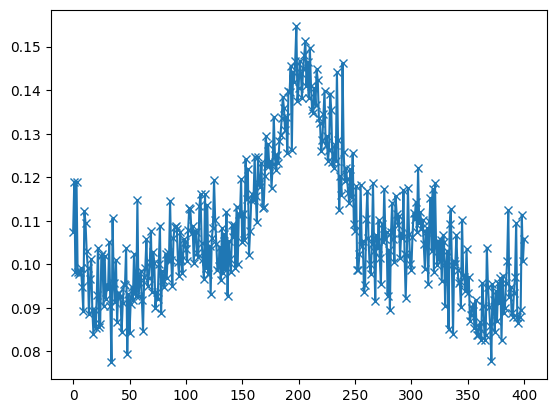

In [60]:
plt.plot(lp, marker="x")

In [61]:
# create 200-length integer array with zero at the middle (index 100)
center_zero_array = np.arange(-100, 101, dtype=int)
assert center_zero_array.size == 201 and center_zero_array[100] == 0


16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat
16:15:42 - There are nans in corr_mat


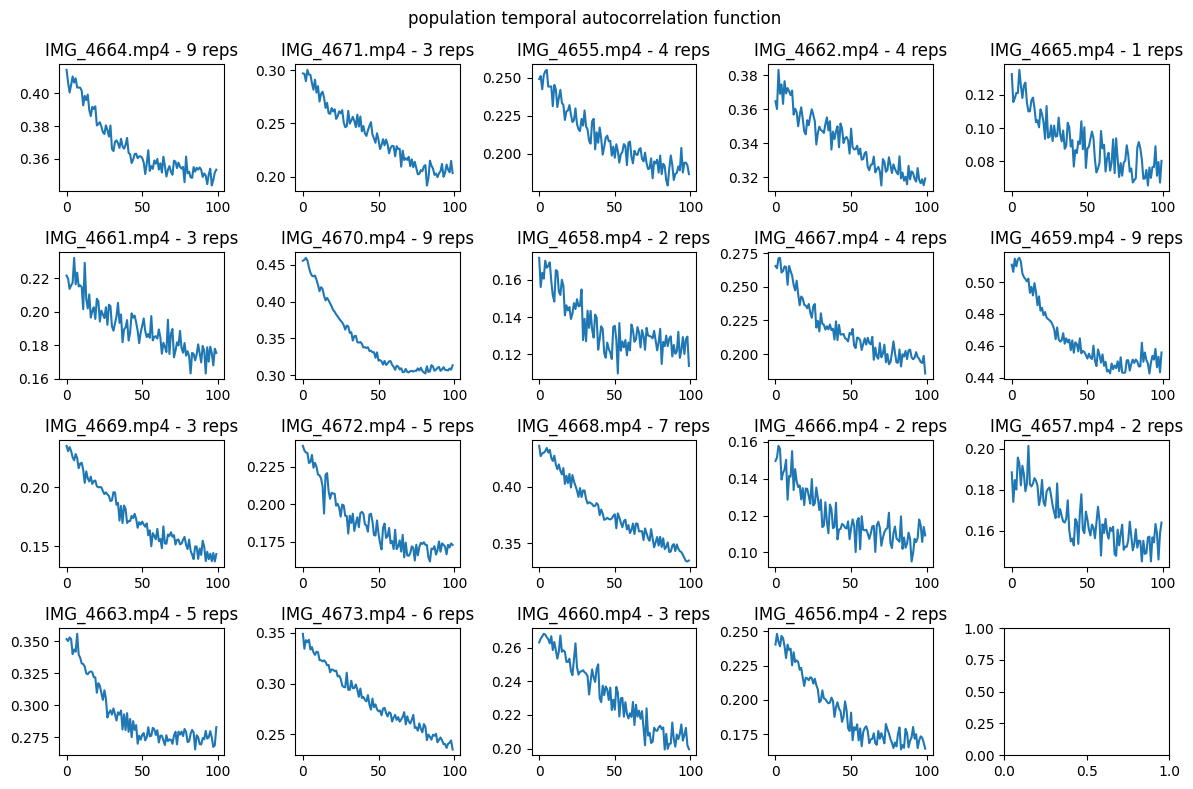

In [62]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_reps = np.mean(data[s], axis=2)
    first_vs_last_mat = autocorr_mat(avg_reps)
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100, symmetric=True)
    #axes_flat[i].plot(idx_max, lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(lp_1st_vs_last[1:])
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("population temporal autocorrelation function")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

16:15:43 - There are nans in corr_mat
IMG_4664.mp4 59 0.10716523077042499
16:15:43 - There are nans in corr_mat
IMG_4671.mp4 100 0.14656831088925246
16:15:43 - There are nans in corr_mat
IMG_4655.mp4 95 0.11023514604225841
16:15:43 - There are nans in corr_mat
IMG_4662.mp4 137 0.12400347618229554
16:15:43 - There are nans in corr_mat
IMG_4665.mp4 100 1.0
16:15:43 - There are nans in corr_mat
IMG_4661.mp4 108 0.11117675744076615
16:15:43 - There are nans in corr_mat
IMG_4670.mp4 110 0.12058949123373185
16:15:43 - There are nans in corr_mat
IMG_4658.mp4 106 0.10057501848578718
16:15:43 - There are nans in corr_mat
IMG_4667.mp4 89 0.10981462922502715
16:15:43 - There are nans in corr_mat
IMG_4659.mp4 22 0.12220117724036444
16:15:43 - There are nans in corr_mat
IMG_4669.mp4 98 0.12998274085645403
16:15:43 - There are nans in corr_mat
IMG_4672.mp4 96 0.0901933613436951
16:15:43 - There are nans in corr_mat
IMG_4668.mp4 91 0.13190804099475886
16:15:43 - There are nans in corr_mat
IMG_4666.mp

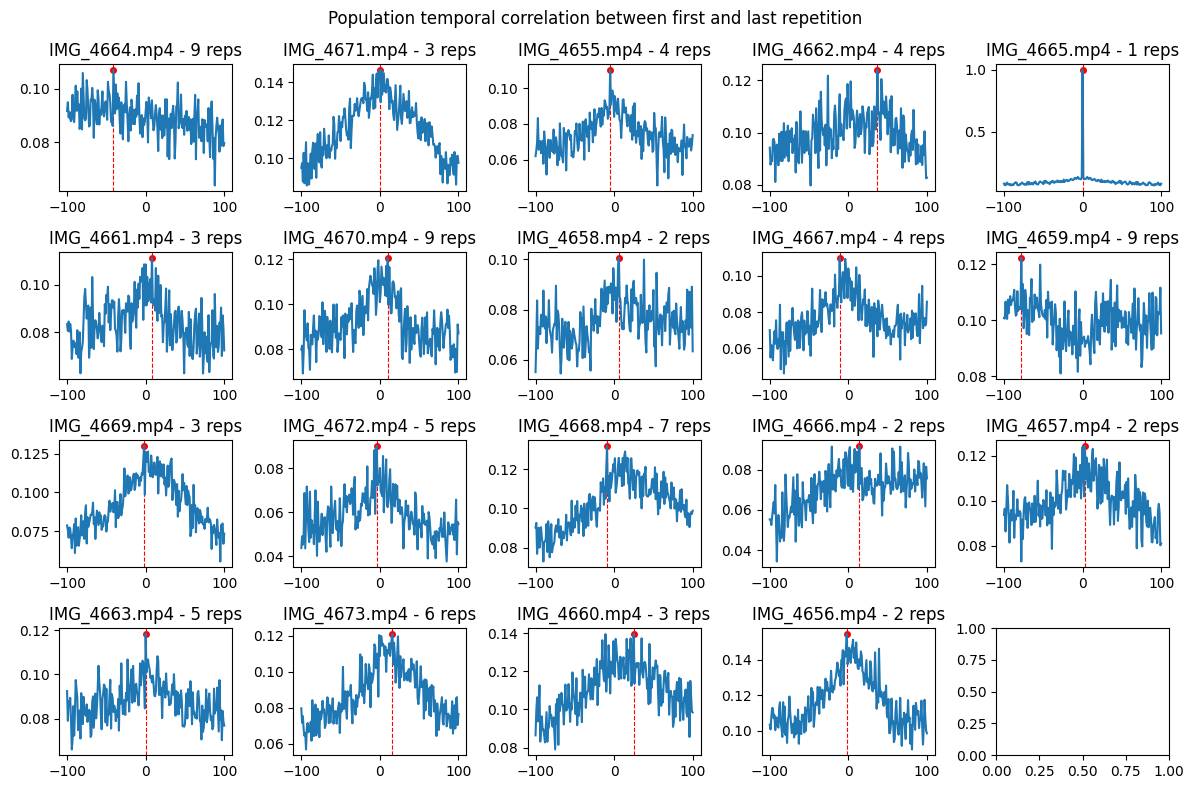

In [63]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    idx_max = int(np.nanargmax(lp_1st_vs_last))
    print(s, idx_max, lp_1st_vs_last[idx_max])
    axes_flat[i].axvline(center_zero_array[idx_max], color='r', linestyle='--', linewidth=0.8)
    axes_flat[i].plot(center_zero_array[idx_max], lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(center_zero_array,lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("Population temporal correlation between first and last repetition")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

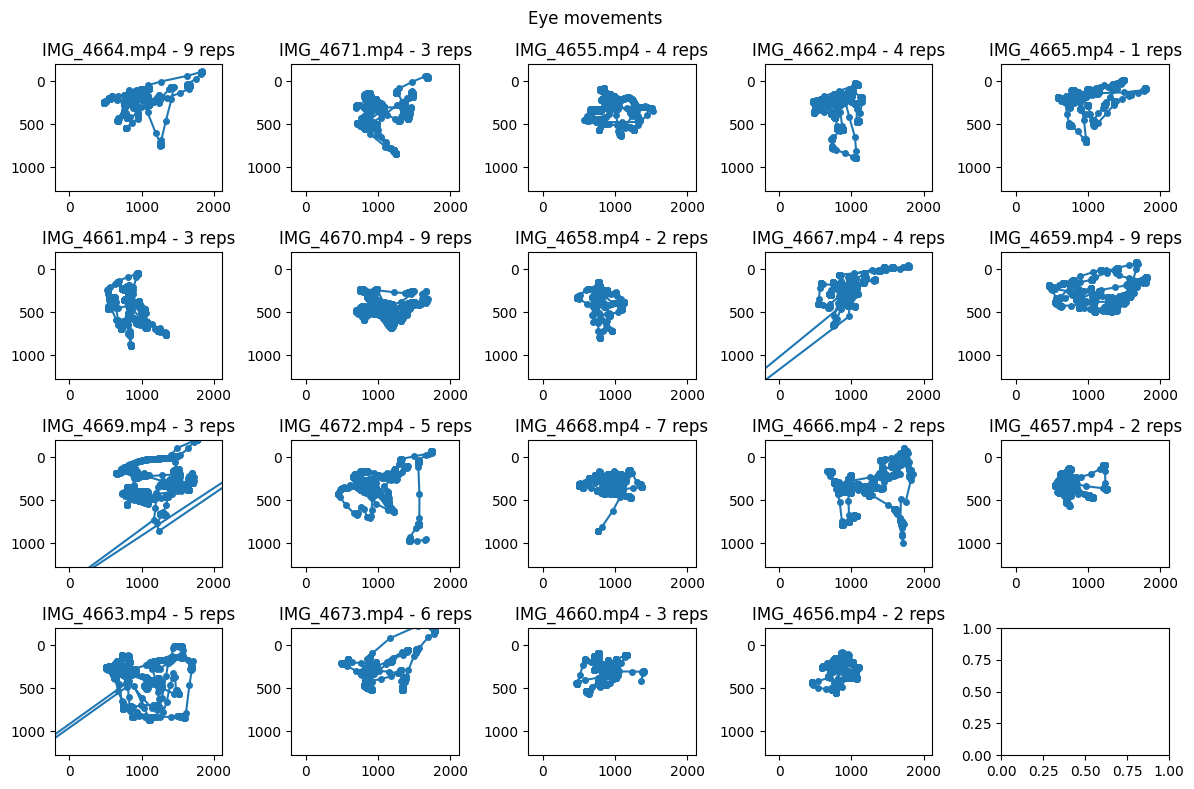

In [64]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    axes_flat[i].plot(data_gaze[s][0,:,0], data_gaze[s][1,:,0], marker="o", markersize=4)
    axes_flat[i].set_xlim(-200, 2120)
    axes_flat[i].set_ylim(-200, 1280)
    axes_flat[i].invert_yaxis()
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("Eye movements")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


In [65]:
data.keys()

dict_keys(['IMG_4664.mp4', 'IMG_4671.mp4', 'IMG_4655.mp4', 'IMG_4662.mp4', 'IMG_4665.mp4', 'IMG_4661.mp4', 'IMG_4670.mp4', 'IMG_4658.mp4', 'IMG_4667.mp4', 'IMG_4659.mp4', 'IMG_4669.mp4', 'IMG_4672.mp4', 'IMG_4668.mp4', 'IMG_4666.mp4', 'IMG_4657.mp4', 'IMG_4663.mp4', 'IMG_4673.mp4', 'IMG_4660.mp4', 'IMG_4656.mp4'])

In [66]:
fn = "IMG_4662.mp4"
movies_folder = movie_paths(paths, list(data.keys()))
video_path = f"{movies_folder}/{fn}"
cap = cv2.VideoCapture(video_path)

In [67]:
video = []
counter = 0
while True:
    counter += 1
    ret, frame = cap.read()
    if not ret:
            print(f"breaking at {counter}")
            break
    frame = np.array(frame, dtype=np.uint8)  
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    video.append(frame)

breaking at 321


In [68]:
eyes.shape

(2, 601)

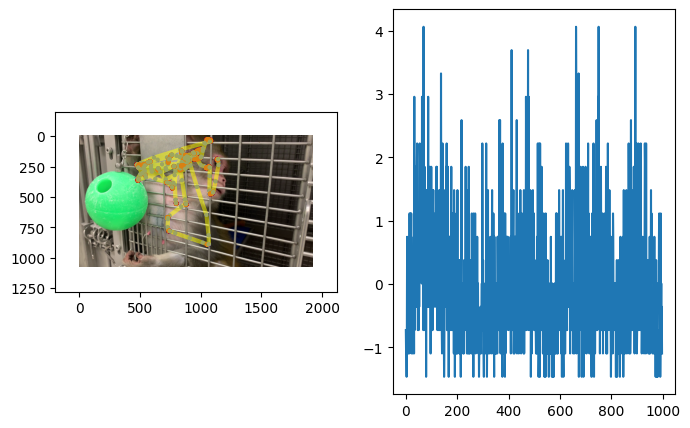

In [71]:
eyes = data_gaze[fn][:,:,0]
neural = zscore(np.mean(data[fn][:,:,0], axis=0))
for i in range(0, eyes.shape[1], 3):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))  # create a figure and axes
    ax[0].imshow(video[int(i//3.3)])
    ax[0].plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax[0].scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax[0].set_xlim(-200, 2120)
    ax[0].set_ylim(-200, 1280)
    ax[0].invert_yaxis()
    ax[1].plot(neural[:i])
    plt.pause(0.01)
    plt.close(fig)  # now this works
    clear_output(wait=True)